## Problem Statement
Linear Regression
1. Given a dataset containing historical weather information of certain area, implement a linear regression model from scratch using gradient descent to predict the apparent temperature. The various attributes of the data are explained in the file description.txt. Note that attributes are text, categorical as well as continuous. Note: Test data will have 10 columns. Apparent temperature column will be missing from in between.
2. Compare the performance of different error functions ( Mean square error, Mean Absolute error, Mean absolute percentage error) and explain the reasons for the observed behaviour.
3. Analyse and report the behaviour of the regression coefficients(for example: sign of coeficients, value of coefficients etc.) and support it with appropriate plots as necessary.

## Introduction
1. Q4 primarily implements data processing routines - to transform input data into a shape that can lend itself to linear regression, and then leverages the code written in Q3 to do the actual linear regression. 
2. We experiment to figure out the alpha and iterations required to get good MSE.  
3. Running this one takes much more time, probably because this is a much higher dimension data (55) compared to Q3 (5). 

In [1]:
import q4
import numpy as np 
import pandas as pd 
from matplotlib import pyplot as plt
import time


## Run the training data regression and find out B and cost trajectory
Here are the parameters we use: 
1. Number of iterations = 100
2. alpha = 0.00000001
3. B = vector with all 0s

These have been found to be optimal with experimentation. 

### Observations
1. Compared to the last question, this one took a still smaller alpha to converge
2. It converges very very quickly, around 60 iterations.
3. Convergence is largely independent of initial value of B (Tried with B as [-10]s and [+10]s with no change in iterations required)

In [2]:
def plot_cost(costs):
    fig, ax = plt.subplots()
    ax.plot(costs)

    ax.set(xlabel='# iterations', ylabel='Cost value', title='How cost reduced iteratively')
    ax.grid()

    plt.show()

def plot_costs(costs1, label1, costs2, label2, costs3, label3):
    fig, ax = plt.subplots()
    ax.plot(costs1, color="green", label = label1)
    ax.plot(costs2, color="red", label = label2)
    ax.plot(costs3, color="blue", label = label3)
    
    ax.set(xlabel='# iterations', ylabel='MSE', title='How cost reduced iteratively')
    ax.grid()
    ax.legend(loc='upper center')

    plt.show()

Formatted Date              datetime64[ns, UTC]
Summary                                  object
Precip Type                              object
Temperature (C)                         float64
Apparent Temperature (C)                float64
Humidity                                float64
Wind Speed (km/h)                       float64
Wind Bearing (degrees)                    int64
Visibility (km)                         float64
Pressure (millibars)                    float64
Daily Summary                            object
dtype: object
Column names: 
 Index(['year', 'quarter', 'month', 'week', 'day', 'day_of_week', 'hour',
       'null', 'rain', 'snow', 'Summary_0', 'Summary_1', 'Summary_2',
       'Summary_3', 'Summary_4', 'Summary_5', 'Summary_6', 'Summary_7',
       'Summary_8', 'Summary_9', 'Summary_10', 'Summary_11', 'Summary_12',
       'Summary_13', 'Summary_14', 'Daily Summary_0', 'Daily Summary_1',
       'Daily Summary_2', 'Daily Summary_3', 'Daily Summary_4',
       'Daily S

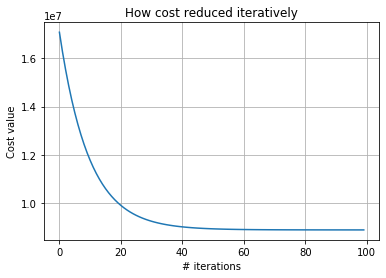

[[ 2.12419239e-06]
 [ 4.27231963e-03]
 [ 7.35128775e-06]
 [ 1.97239731e-05]
 [ 8.18828021e-05]
 [ 3.34757360e-05]
 [ 6.30745021e-06]
 [ 3.15789426e-05]
 [ 3.72949628e-09]
 [ 3.79526188e-06]
 [-1.67479899e-06]
 [-7.70893905e-09]
 [-2.42740510e-08]
 [ 2.81215510e-07]
 [ 1.71383316e-06]
 [-5.32227091e-11]
 [ 4.80056470e-10]
 [ 2.24106951e-08]
 [-6.66747395e-07]
 [ 6.62486873e-09]
 [-6.01653700e-11]
 [ 6.96951267e-07]
 [-5.22334822e-07]
 [ 1.80261649e-06]
 [ 2.38942451e-11]
 [-3.46782235e-09]
 [ 5.31733851e-08]
 [-6.22202126e-08]
 [-6.45878694e-08]
 [ 3.97747700e-08]
 [ 1.01132120e-06]
 [ 5.02625381e-08]
 [ 5.02994476e-07]
 [ 1.31064427e-09]
 [ 1.20615253e-07]
 [-6.22349974e-07]
 [ 2.85678709e-07]
 [ 5.11546669e-10]
 [ 1.11314384e-07]
 [ 1.65407506e-07]
 [ 5.00987454e-07]
 [-1.04924792e-07]
 [-3.52367082e-08]
 [ 1.31764997e-06]
 [ 1.01542581e-09]
 [ 2.79235012e-07]
 [ 5.44021115e-07]
 [ 5.02994476e-07]
 [ 2.99442099e-07]
 [-5.58796955e-09]
 [ 1.27162782e-04]
 [ 2.97852517e-07]
 [ 1.8572708

In [22]:
def print_Blist(B):
    for bval in B:
        print(round(bval, 8), " ", end='')
        
alpha = 0.00000001
iteration = 100
B = [0]*56


af = q4.Weather()
af.train("Datasets/Question-4/weather.csv", alpha, iteration)
print("\nFinal cost function: ", af.costs[-1])

plot_cost(af.costs)
B = af.B

## Characteristics of B (Regression coefficients)
There are 55 dimensions so we have 56 values in B vector. The values are quite extreme.
1. Very large spread (min: Bmin =  -0.000001.6748  Bmax =  0.0042723)
2. Very concentrated (see histogram) - 53 of 56 coeff are in the first bar, concentrated around 0. 
3. Here are the top 10 attributes (based on value of regression coefficients): 'year', 'Pressure (millibars)', 'Wind Bearing (degrees)', 'Temperature (C)', 'week', 'Visibility (km)', 'day', 'hour', 'month', 'Wind Speed (km/h)' These contribute the most to the regression equations, which kind of makes sense (other than the year)


Bmin =  -1.674798985660599e-06  Bmax =  0.0042723196299195776
Hist bins:  (array([53.,  1.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  1.]), array([-1.67479899e-06,  4.25724644e-04,  8.53124087e-04,  1.28052353e-03,
        1.70792297e-03,  2.13532242e-03,  2.56272186e-03,  2.99012130e-03,
        3.41752074e-03,  3.84492019e-03,  4.27231963e-03]), <a list of 10 Patch objects>)


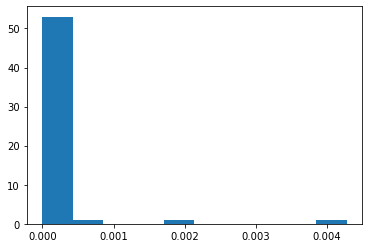

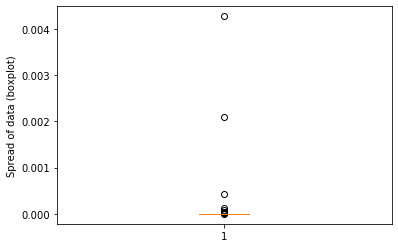

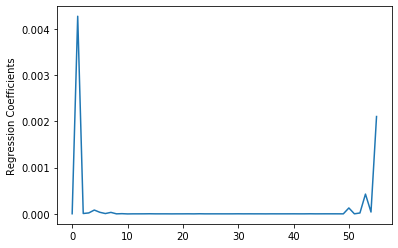

In [39]:
import matplotlib.pyplot as plt
import numpy as np
x = plt.hist(B)
bmin = np.min(B)
bmax = np.max(B)
print("Bmin = ", bmin, " Bmax = ", bmax)
print("Hist bins: ", x)
fig, ax = plt.subplots()
#ax.set_title('Multiple Samples with Different sizes')
ax.axis(ylim = (bmin, bmax))
ax.boxplot(B)
plt.ylabel('Spread of data (boxplot)');
plt.show()

fig, ax = plt.subplots()
#ax.set_title('Multiple Samples with Different sizes')
ax.axis(ylim = (bmin, bmax))
ax.plot(B)
#ax.boxplot(data)
plt.ylabel('Regression Coefficients');
plt.show()


## Characteristics of MSE, MAE, MAPE
In this case, it is not possible to calculate MAPE because Y has some 0 values. MSE and MAE are both low which suggests good fitment. 

In [9]:
clf = af.af # The classifier implemented in Q3
X = clf.clf_prepareX(clf.X)
Y = clf.Y
    
B = af.B
predicted_value = X.dot(B)
loss = predicted_value - Y
MSE = np.square(loss).mean(axis = 0)
MAE = np.abs(loss).mean(axis = 0)
if (0 in Y):
    print("Y has 0! MAPE not possible!")
else:
    MAPE = np.abs(loss/Y).mean(axis = 0)

#print (Y)
print("MSE: ", MSE, "MAE: ", MAE, "MAPE: ", MAPE)


Y has 0! MAPE not possible!
MSE:  [114.94899708] MAE:  [9.03819579] MAPE:  [inf]
